In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV as RCV
from sklearn.model_selection import cross_val_score as crs
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
df=pd.read_csv('gld_price_data.csv')
df.head(50)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [3]:
print(df.shape)
print(df.isna().sum())

(2290, 6)
Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64


In [4]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [5]:
df['week']=pd.to_datetime(df['Date']).dt.week
df['month']=pd.to_datetime(df['Date']).dt.month
df['year']=pd.to_datetime(df['Date']).dt.year

<ipython-input-5-3580256d4e95>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week']=pd.to_datetime(df['Date']).dt.week


In [6]:
df.drop(['Date'],axis=1,inplace=True)

In [7]:
df.head(100)

,SPX,GLD,USO,SLV,EUR/USD,week,month,year
0,1447.160034,84.860001,78.470001,15.180000,1.471692,1,1,2008
1,1447.160034,85.570000,78.370003,15.285000,1.474491,1,1,2008
2,1411.630005,85.129997,77.309998,15.167000,1.475492,1,1,2008
3,1416.180054,84.769997,75.500000,15.053000,1.468299,2,1,2008
4,1390.189941,86.779999,76.059998,15.590000,1.557099,2,1,2008
...,...,...,...,...,...,...,...,...
95,1377.199951,86.650002,98.980003,16.641001,1.558895,23,6,2008
96,1404.050049,86.449997,103.949997,16.972000,1.578507,23,6,2008
97,1361.760010,87.989998,109.050003,16.944000,1.546408,24,6,2008
98,1358.439941,85.550003,107.019997,16.440001,1.555791,24,6,2008


C:\Users\MUNDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


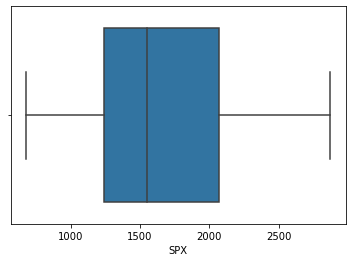

C:\Users\MUNDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


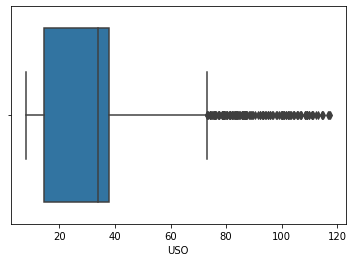

C:\Users\MUNDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


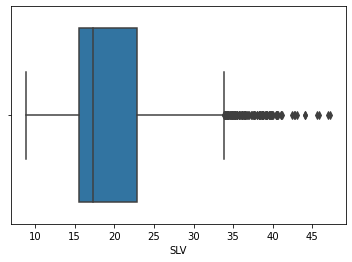

C:\Users\MUNDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


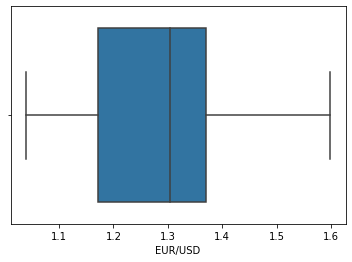

C:\Users\MUNDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


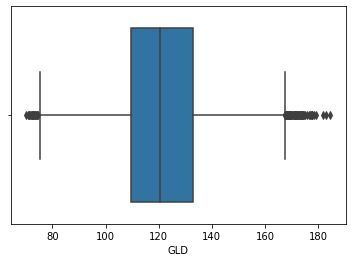

In [8]:
cont_features=['SPX','USO','SLV','EUR/USD','GLD']
for x in cont_features:
    sns.boxplot(df[x])
    plt.xlabel(x)
    plt.show()

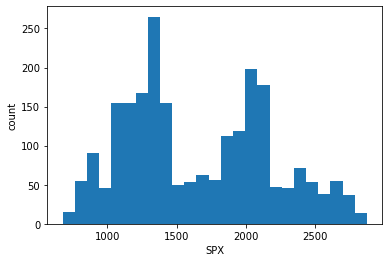

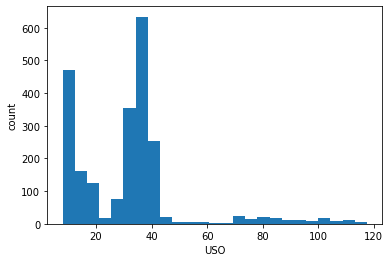

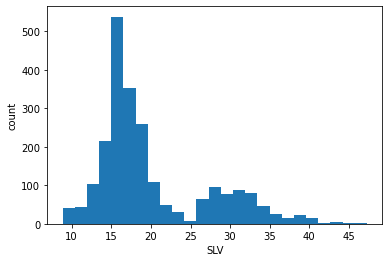

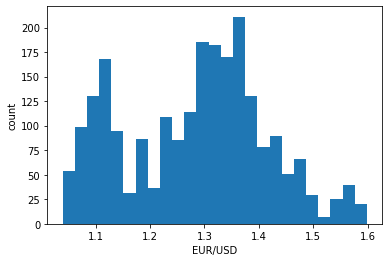

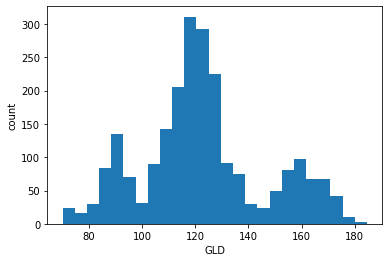

In [9]:
for x in cont_features:
    plt.hist(df[x],bins=25)
    plt.xlabel(x)
    plt.ylabel('count')
    plt.show()

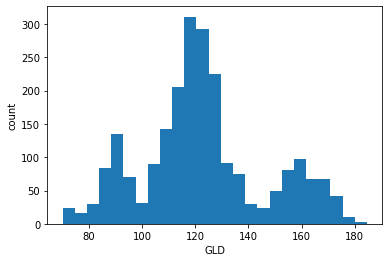

In [10]:
plt.hist(df['GLD'],bins=25)
plt.xlabel('GLD')
plt.ylabel('count')
plt.show()

In [11]:
df[cont_features].skew()

SPX        0.300362
USO        1.699331
SLV        1.153641
EUR/USD   -0.005292
GLD        0.334138
dtype: float64

In [12]:
##log tranformation of features have skewness >.75
for x in ['USO','SLV']:
    df[x]=np.log(df[x])

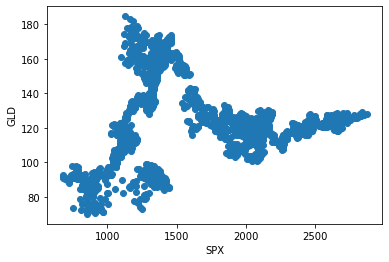

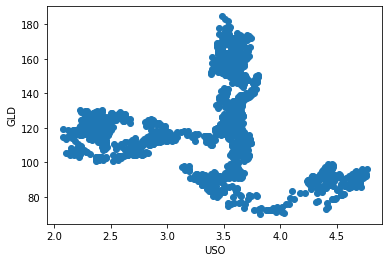

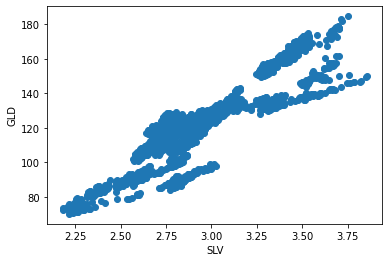

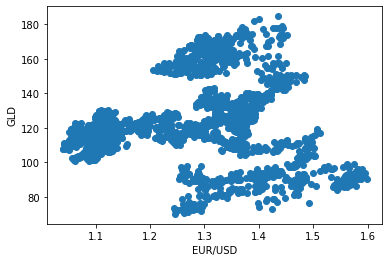

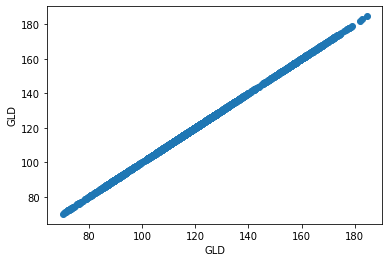

In [13]:
for x in cont_features:
    plt.scatter(df[x],df['GLD'])
    plt.xlabel(x)
    plt.ylabel('GLD')
    plt.show()

In [14]:
df.year.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
      dtype=int64)

C:\Users\MUNDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MUNDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


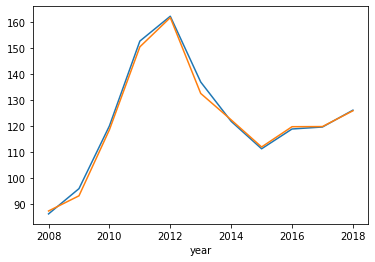

In [15]:
g=df.groupby('year').agg({'GLD':['mean','median']})
sns.lineplot(g['GLD']['mean'].index,g['GLD']['mean'].values,)
sns.lineplot(g['GLD']['median'].index,g['GLD']['median'].values)
plt.show()

C:\Users\MUNDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MUNDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


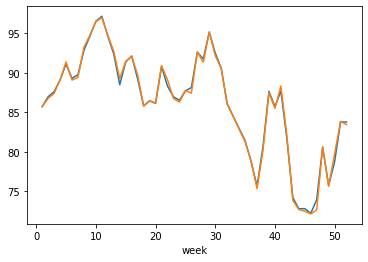

C:\Users\MUNDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MUNDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


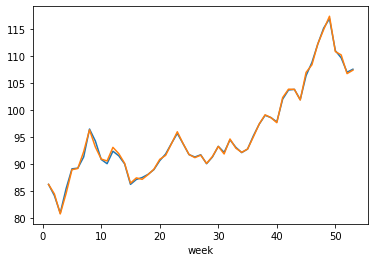

C:\Users\MUNDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MUNDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


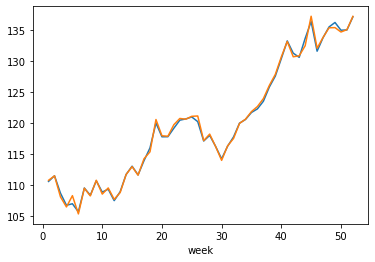

C:\Users\MUNDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MUNDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


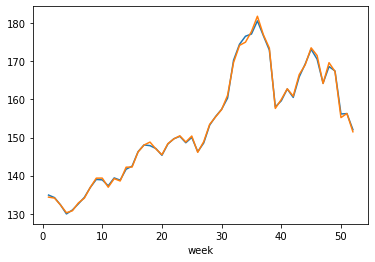

C:\Users\MUNDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MUNDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


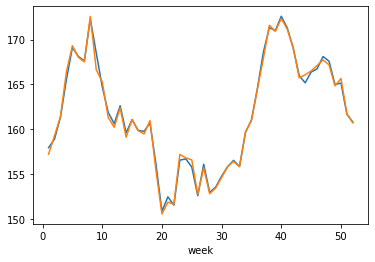

C:\Users\MUNDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MUNDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


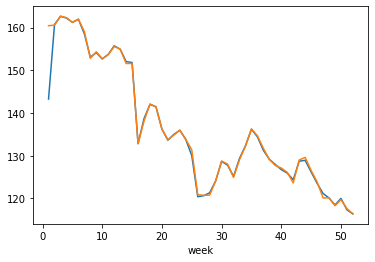

C:\Users\MUNDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MUNDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


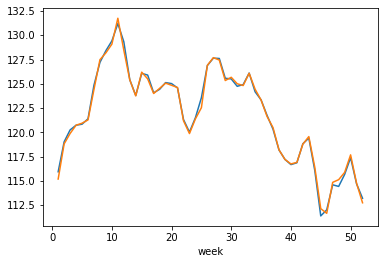

C:\Users\MUNDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MUNDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


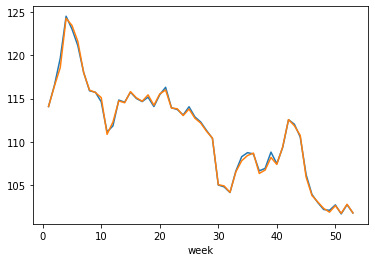

C:\Users\MUNDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MUNDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


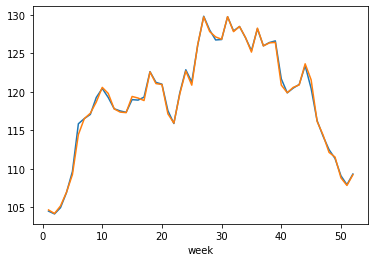

C:\Users\MUNDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MUNDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


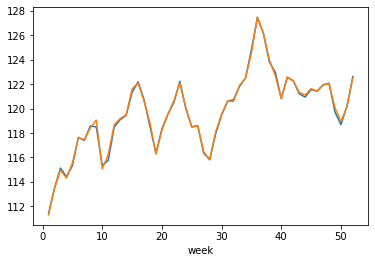

C:\Users\MUNDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MUNDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


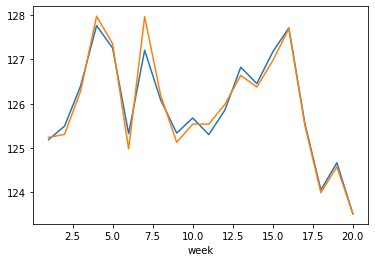

In [16]:
years=df['year'].unique()
for x in years:
    g=df[df['year']==x].groupby('week').agg({'GLD':['mean','median']})
    sns.lineplot(g['GLD']['mean'].index,g['GLD']['mean'].values,)
    sns.lineplot(g['GLD']['median'].index,g['GLD']['median'].values)
    plt.show()

* From Data Analysis it seems that be can drop date(month,year,week)

# Feature Selection with XGB feature importance

In [17]:
X=df.copy()
X.drop(['GLD'],axis=1,inplace=True)
Y=df['GLD']
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.20,random_state=42)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

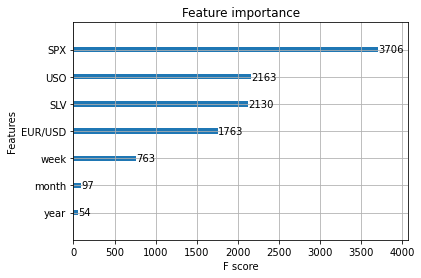

In [18]:
xgb=XGBRegressor(max_depth=10,n_estimators=100)
xgb.fit(xtrain,ytrain)
plot_importance(xgb)

Also from Xgb feature importance it is clear that we should drop week month year 

In [19]:
df.drop(['week','month','year'],axis=1,inplace=True)

# Model Training

In [20]:
X=df.copy()
X.drop(['GLD'],axis=1,inplace=True)
Y=df['GLD']
scaler=MinMaxScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.20,random_state=42)

In [22]:
X.head()

,SPX,USO,SLV,EUR/USD
0,0.350870,0.850083,0.322079,0.772924
1,0.350870,0.849610,0.326193,0.777924
2,0.334693,0.844551,0.321567,0.779713
3,0.336765,0.835750,0.317064,0.766862
4,0.324931,0.838495,0.337987,0.925504


In [23]:
degree=[1,2,3,4,5,6]

for x in degree:
    model=LinearRegression()
    trans=PolynomialFeatures(x)
    ptest=trans.fit_transform(xtest)
    ptrain=trans.fit_transform(xtrain)
    score=crs(model,ptrain,ytrain,cv=5)
    model.fit(ptrain,ytrain)
    print('degree',end=" ")
    print(x,end=" ")
    print(np.mean(score),end=" ")
    print(model.score(ptest,ytest))
    

degree 1 0.8938139404887776 0.913275470726026
degree 2 0.9517153494983335 0.9571073429865306
degree 3 0.96129228730987 0.9570905079405971
degree 4 0.9712254869937331 0.9740770262358219
degree 5 0.9757671306056735 0.9785659634235602
degree 6 0.9698038367402224 0.9698517914586149


In [24]:
dtree=DecisionTreeRegressor()
params={
        'max_depth':[x for x in range(4,20)],
        'min_samples_leaf':[x for x in range(4,20)],
        'min_samples_split':[x for x in range(4,20)]
       }
rcv=RCV(dtree,param_distributions=params,cv=5,random_state=42)
search=rcv.fit(xtrain,ytrain)
print(search.best_estimator_)
print(search.best_score_)


DecisionTreeRegressor(max_depth=16, min_samples_leaf=5, min_samples_split=8)
0.9788907703799363


In [25]:
search.best_estimator_.score(xtest,ytest)

0.9782290187638829

In [26]:
RF=RandomForestRegressor()
params={'n_estimators':[x for x in range(90,150)],
        'max_depth':[x for x in range(4,20)],
        'min_samples_leaf':[x for x in range(4,20)],
        'min_samples_split':[x for x in range(4,20)]
       }
rcv=RCV(RF,param_distributions=params,cv=5,random_state=42)
search=rcv.fit(xtrain,ytrain)
print(search.best_estimator_)
print(search.best_score_)
print(search.best_estimator_.score(xtest,ytest))

RandomForestRegressor(max_depth=11, min_samples_leaf=6, min_samples_split=17,
                      n_estimators=138)
0.9823500146069939
0.9873724463489114


In [27]:
print(search.best_estimator_.feature_importances_)
print(xtrain.columns)

[0.17202175 0.03374032 0.76930173 0.0249362 ]
Index(['SPX', 'USO', 'SLV', 'EUR/USD'], dtype='object')


# Conclusion

* SLV is most important feature in predicting Gold Price
* All model train gave good accuracy
  
  Random Forest Regressor
  Cross val Score=0.9823500146069939
  Test Score=0.9873724463489114